In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [26]:
from konlpy.tag import Mecab
mecab =Mecab()

In [347]:
train_data=pd.read_excel('C:/data/sport_news.xlsx')

In [348]:
train_data=train_data["comment"]

In [349]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [353]:
print(len(train_data)) # 리뷰 개수 출력

283177


In [354]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data = train_data.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [356]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [357]:
mecab =Mecab()
tokenized_data = []
for sentence in train_data:
    temp_X = mecab.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 434
리뷰의 평균 길이 : 23.40464091363352


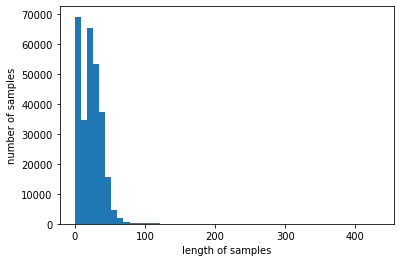

In [358]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [359]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 50,iter = 200, window = 5, min_count = 1, workers = 4, sg = 0)

In [123]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(53859, 50)

In [360]:
model.save("C:/data/whatcha_nsmc_nouns") # 모델 저장

In [445]:
model = Word2Vec.load('c:/data/whatcha_nsmc_nouns')

In [143]:
import random

In [457]:
df_augment=pd.read_excel('C:/data/whatcha_labeled.xlsx')

In [459]:
df_augment=df_augment[df_augment['label']==1].reset_index(drop=True)

In [461]:
df_augment=df_augment['comment']

In [463]:

aug_list=[]
for i in range(len(df_augment)):
    print(i)
    tmp_list=mecab.pos(df_augment[i])

    j=0
    while True:
        j+=1
        test_list=[]
        for word, tag in tmp_list:
            if tag in ['NNG']:
                if len(word)==1:
                    test_list.append(word)
                    break
                try:
                    w2v_list=model.wv.most_similar(word)
                except KeyError:
                    test_list.append(word)
                    break
                word_list=[]
                for token, score in w2v_list:
                    if score < 0.55:
                        word_list.append(word)
                        break
                    w=mecab.pos(token)
                    if w[0][1]=='NNG':
                        word_list.append(token)
                    if len(word_list)==2:
                        break
                try:
                    test_list.append(random.choice(word_list))

                except IndexError:
                    test_list.append(word)    
            else:
                test_list.append(word)

        tmp=" ".join(test_list)
        aug_list.append(tmp)
        if j==100:
            break
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [464]:
aug_set_list=set(aug_list)

In [465]:
len(aug_set_list)

12695

In [466]:
df_aug_list=pd.DataFrame(aug_set_list)

In [467]:
df_aug_list.to_excel('c:/data/whatcha_aug_pos.xlsx')